In [1]:
import pandas as pd
import numpy as np

In [2]:
df22p = pd.read_csv("../data/klips/1-22차 release (Excel)/klips22p.csv")

/home/henry/anaconda3/envs/pension/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (427,432,437,442,488,569,582,668) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df22p.head()

,pid,hhid22,hmem22,hhid21,hhid20,hhid19,hhid18,hhid17,hhid16,hhid15,...,p229509,p229510,p229511,w22p_l,w22p_c,sw22p_l,sw22p_c,nw22p_l,nw22p_c,version
0,101,1,1,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,NaN,2229.963059,2233.690096,1321.808425,2553.125581,0.000000,1092.528625,22
1,102,1,5,7258.0,7258.0,7258.0,7258.0,7258.0,7258.0,7258.0,...,1,1,NaN,2239.814828,2233.690096,4396.932507,2674.992445,2471.734660,1181.711881,22
2,201,6034,1,6034.0,6034.0,6034.0,6034.0,6034.0,6034.0,6034.0,...,1,1,NaN,2661.362399,2659.934780,2828.952855,2531.755306,1343.865230,1324.446434,22
3,202,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1,1,NaN,2561.614392,2560.240281,5782.713667,4854.596363,2462.173138,2194.860886,22
4,203,8589,1,8589.0,8589.0,8589.0,8589.0,8589.0,8589.0,NaN,...,1,1,NaN,697.995546,348.810562,7067.002642,3609.326492,2078.818477,2098.913482,22


In [4]:
# 사회보험의 종류 1
df22p['p222151'].value_counts()

1.0     2452
7.0      254
18.0     216
3.0      208
13.0     121
17.0     112
2.0       61
6.0       50
11.0      49
8.0       37
16.0      36
12.0      31
14.0      28
10.0       7
15.0       5
Name: p222151, dtype: int64

In [5]:
# 사회보험의 종류 2
df22p['p222161'].value_counts()

13.0    49
16.0    45
1.0     34
18.0    26
11.0    19
3.0      8
12.0     8
17.0     5
8.0      4
2.0      3
15.0     2
14.0     2
7.0      2
10.0     1
Name: p222161, dtype: int64

In [6]:
# 사회보험의 종류 3
df22p['p222171'].value_counts()

13.0    3
18.0    2
16.0    2
3.0     1
1.0     1
Name: p222171, dtype: int64

In [7]:
# 사회보험의 종류 3
df22p['p222181'].value_counts()

Series([], Name: p222181, dtype: int64)

In [8]:
# 출생연도
len(df22p[df22p['p220104']==1970])

383

In [9]:
len(df22p[df22p['p220104']==1980])

481

In [10]:
len(df22p[df22p['p220104']==1990])

215

In [11]:
# 제6차 직업분류
df22p['p220351']

0          NaN
1        762.0
2        941.0
3        941.0
4          NaN
         ...  
23220    851.0
23221    248.0
23222    854.0
23223    246.0
23224    792.0
Name: p220351, Length: 23225, dtype: float64

<AxesSubplot:>

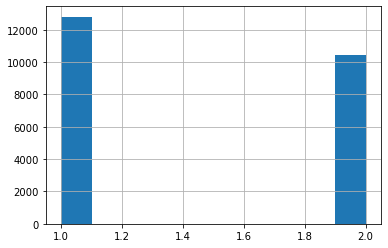

In [12]:
# 고용여부: 취업자 ~ 1
df22p['p220201'].hist()

In [13]:
# 종업원수
df22p['p220403'].isnull()

0         True
1        False
2         True
3         True
4         True
         ...  
23220    False
23221    False
23222    False
23223    False
23224    False
Name: p220403, Length: 23225, dtype: bool

In [14]:
df22p['p220403'].value_counts()

3.0     975
10.0    890
11.0    668
7.0     593
2.0     574
4.0     477
1.0     351
5.0     318
6.0     264
9.0     251
8.0     202
Name: p220403, dtype: int64

In [15]:
# 취업형태, 종업원수 filter
print(f"Obs before filtering: {len(df22p)}")
df22p_filtered = df22p[(df22p['p220211'] == 1) & (df22p['p220403'] != np.nan)]
print(F"Obs after filtering: {len(df22p_filtered)}")

Obs before filtering: 23225
Obs after filtering: 9245


In [16]:
# np.nan is a float, but it does not comprise the ordered field.

print(type(np.nan))
print(np.nan <= 0)

<class 'float'>
False


In [17]:
# 기업규모 변수 구성
"""
firm_size variable

1   - 전체종업원수 100인 미만
2   - 전체종업원수 300인 미만
3   - 전체종업원수 300인 이상
-1  - 결측치
"""

def firm_size(row):
    if row['p220403'] <= 6:
        return 1
    elif row['p220403'] <= 7:
        return 2
    elif row['p220403'] <= 10:
        return 3
    temp = row['p220402']
    if temp <= 99:
        return 1
    elif temp <= 299:
        return 2
    elif temp >= 300:
        return 3
    else:
        return -1

df22p_filtered['firm_size'] = df22p_filtered.apply(firm_size, axis=1)

/tmp/ipykernel_25611/2460676642.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df22p_filtered['firm_size'] = df22p_filtered.apply(firm_size, axis=1)


In [18]:
df22p_filtered['firm_size'].value_counts()

 1    5294
-1    1752
 3    1479
 2     720
Name: firm_size, dtype: int64

<AxesSubplot:>

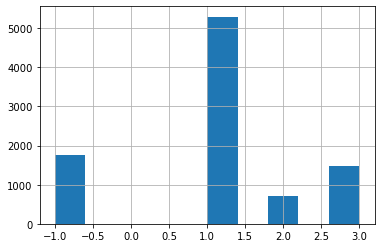

In [19]:
df22p_filtered['firm_size'].hist()

In [20]:
df22p_V2 = df22p_filtered[df22p_filtered['firm_size'] >= 0]

<AxesSubplot:>

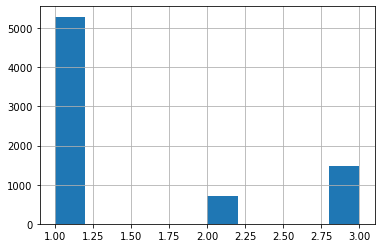

In [21]:
df22p_V2['firm_size'].hist()

In [22]:
# 직업 유형 변수 구성
"""
job_type

-1  - 결측값
1   - 화이트칼라
2   - 블루칼라
9   - 화이트 칼라와 블루 칼라 외

"""
def job_type(row):
    
    if np.isnan(row['p220351']):
        return -1
    if row['p220351'] >= 100 and row['p220351'] < 400:
        return 1
    elif row['p220351'] >= 600 and row['p220351'] < 900:
        return 2
    else:
        return 9

df22p_V2['job_type'] = df22p_V2.apply(job_type, axis=1)

/tmp/ipykernel_25611/2706973189.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df22p_V2['job_type'] = df22p_V2.apply(job_type, axis=1)


In [23]:
df22p_V2['job_type'].value_counts()

1    3397
9    2303
2    1793
Name: job_type, dtype: int64

In [24]:
df22p_V3 = df22p_V2[(df22p_V2['job_type'] <= 5) & (df22p_V2['job_type'] >= 0)]
print(df22p_V3.shape)

(5190, 726)


In [25]:
# 직업 유형2 변수 구성
"""
job_type2
1   - 상용직
2   - 임시일용직
9   - 고용주/자영업자 또는 무급가족종사자
-1  - 결측값
"""


def job_type2(row): 
    
    if row['p220314'] <= 1:
        return 1
    elif row['p220314'] <= 2 and row['p220314'] <= 3:
        return 2
    elif row['p220314'] <= 5:
        return 9
    else:
        return -1
    
df22p_V3['job_type2'] = df22p_V2.apply(job_type2, axis=1)

/tmp/ipykernel_25611/3915605336.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df22p_V3['job_type2'] = df22p_V2.apply(job_type2, axis=1)


In [26]:
df22p_V3['job_type2'].value_counts()

1    4469
2     473
9     248
Name: job_type2, dtype: int64

In [27]:
df22p_V4 = df22p_V3[(df22p_V3['job_type2'] <= 5) & (df22p_V3['job_type2'] >= 0)]

In [28]:
df22p_V4.shape

(4942, 727)

In [32]:
df22p_V4.groupby(['p220101', 'job_type', 'job_type2', 'firm_size'])['p221642'].mean().unstack().unstack().fillna(0)

firm_size                  1                       2                       3  \
job_type2                  1           2           1           2           1   
p220101 job_type                                                               
1       1         336.877023  214.500000  378.240664  322.500000  492.118151   
        2         280.877604  212.556701  321.921687  216.000000  428.398496   
2       1         224.064481  150.905405  266.048000  198.230769  321.522556   
        2         177.186567  149.720000  205.393939  183.750000  249.629630   

firm_size                     
job_type2                  2  
p220101 job_type              
1       1         296.500000  
        2         250.000000  
2       1         199.971429  
        2         120.000000

In [77]:
# 1970년생 전일제 임금근로자 중 블루 칼라, 화이트 칼라
dfCohort1970 = df22p_V4[
    (df22p_V4['p220104'] == 1970) # 1970년생
    & (df22p_V4['p220211'] == 1) # 임금근로자 
    & (df22p_V4['p220315'] == 2) # 전일제
]

In [88]:
# 1980년생 전일제 임금근로자 중 블루 칼라, 화이트 칼라
dfCohort1980 = df22p_V4[
    (df22p_V4['p220104'] == 1980) # 1980년생
    & (df22p_V4['p220211'] == 1) # 임금근로자 
    & (df22p_V4['p220315'] == 2) # 전일제
]

In [89]:
# 1990년생 전일제 임금근로자 중 블루 칼라, 화이트 칼라
dfCohort1990 = df22p_V4[
    (df22p_V4['p220104'] == 1990) # 1990년생
    & (df22p_V4['p220211'] == 1) # 임금근로자 
    & (df22p_V4['p220315'] == 2) # 전일제
]

In [90]:
len(dfCohort1970)

126

In [91]:
len(dfCohort1980)

184

In [92]:
len(dfCohort1990)

84

In [93]:
dfCohort1970.groupby(['p220101', 'job_type', 'job_type2'])['pid'].count().unstack().unstack().fillna(0)

job_type2   1      2   
job_type    1   2  1  2
p220101                
1          54  29  1  1
2          26  10  3  2

In [94]:
dfCohort1980.groupby(['p220101', 'job_type', 'job_type2'])['pid'].count().unstack().unstack().fillna(0)

job_type2     1          2     
job_type      1     2    1    2
p220101                        
1          92.0  42.0  1.0  1.0
2          46.0   2.0  0.0  0.0

In [95]:
dfCohort1990.groupby(['p220101', 'job_type', 'job_type2'])['pid'].count().unstack().unstack().fillna(0)

job_type2     1          2     
job_type      1     2    1    2
p220101                        
1          28.0  21.0  1.0  1.0
2          31.0   1.0  1.0  0.0

In [96]:
dfCohort1970[dfCohort1970['firm_size'] < 3].groupby(['p220101', 'job_type', 'job_type2'])['pid'].count().unstack().unstack().fillna(0)

job_type2   1      2   
job_type    1   2  1  2
p220101                
1          28  21  1  1
2          19   8  3  2

In [97]:
dfCohort1980[dfCohort1980['firm_size'] < 3].groupby(['p220101', 'job_type', 'job_type2'])['pid'].count().unstack().unstack().fillna(0)

job_type2     1          2     
job_type      1     2    1    2
p220101                        
1          60.0  27.0  1.0  1.0
2          37.0   1.0  0.0  0.0

In [99]:
dfCohort1990[dfCohort1990['firm_size'] < 3].groupby(['p220101', 'job_type', 'job_type2'])['pid'].count().unstack().unstack().fillna(0)

job_type2     1          2     
job_type      1     2    1    2
p220101                        
1          20.0  18.0  1.0  1.0
2          23.0   1.0  1.0  0.0

In [86]:
dfCohort1970[dfCohort1970['firm_size'] < 3].groupby(['p220101', 'job_type', 'firm_size'])['pid'].count().unstack().unstack().fillna(0)

firm_size   1      2   
job_type    1   2  1  2
p220101                
1          23  21  6  1
2          20   6  2  4

In [100]:
dfCohort1980[dfCohort1980['firm_size'] < 3].groupby(['p220101', 'job_type', 'firm_size'])['pid'].count().unstack().unstack().fillna(0)

firm_size     1           2     
job_type      1     2     1    2
p220101                         
1          48.0  21.0  13.0  7.0
2          35.0   1.0   2.0  0.0

In [102]:
dfCohort1990[dfCohort1990['firm_size'] < 3].groupby(['p220101', 'job_type', 'firm_size'])['pid'].count().unstack().unstack().fillna(0)

firm_size     1          2     
job_type      1     2    1    2
p220101                        
1          14.0  14.0  7.0  5.0
2          20.0   0.0  4.0  1.0

In [120]:
# 가설적 인구집단 변수 구성
""" 
1970년 HRB
G1 남성 / 176 / 상용직 / 100인 미만 / 블루 칼라 / 1994 / 33 / 고졸 / 조기은퇴
G2 남성 / 226.5 /상용직 / 100인 이상 300인 미만 / 화이트 칼라 / 1989 / 30 / 대졸 / 조기은퇴
G3 여성 / 147.8 / 상용직 / 100인 이상 300인 미만 / 화이트 칼라 / 1992 / 대졸 / 조기은퇴
G4 여성 / 121.0 /임시일용 / 100인 미만 / 블루 칼라 / 1989 / 31 / 고졸 / 실업
G5 남성 / 165.6 /임시일용 / 100인 미만 / 블루 칼라 / 1992 / 31 / 고졸 /실업
G6 여성 / 121.0 / 임시일용 / 100인 미만 / 블루 칼라 / 1989 / 21/ 고졸 / 실업
"""


def HRB(row): 
    
    if (row['p220101'] == 1) & (row['job_type'] == 2) & (row['job_type2'] == 1) & (row['firm_size'] == 1):        
        return 1
    elif (row['p220101'] == 1) & (row['job_type'] == 1) & (row['job_type2'] == 1) & (row['firm_size'] == 2):
        return 2
    elif (row['p220101'] == 2) & (row['job_type'] == 1) & (row['job_type2'] == 1) & (row['firm_size'] == 2):
        return 3
    elif (row['p220101'] == 2) & (row['job_type'] == 2) & (row['job_type2'] == 2) & (row['firm_size'] == 1):
        return 4
    elif (row['p220101'] == 1) & (row['job_type'] == 2) & (row['job_type2'] == 2) & (row['firm_size'] == 1):
        return 5
    elif (row['p220101'] == 2) & (row['job_type'] == 2) & (row['job_type2'] == 2) & (row['firm_size'] == 1):
        return 6
    else:
        return -1
    
dfCohort1970['HRB'] = dfCohort1970.apply(HRB, axis=1)

/tmp/ipykernel_37687/1285566363.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCohort1970['HRB'] = dfCohort1970.apply(HRB, axis=1)


In [ ]:
dfCohort1970['HRB'].groupby(['HRB'])['p221642']

In [ ]:
# 1970년대 가설적 인구집단

dfG1 = dfCohort1970[(dfCohort1970['p220101'] == 1) & # 남성
                    (dfCohort1970['job_type'] == 1) & # 화이트 칼라
                    (dfCohort1970['job_type2'] == 1) & # 상용직
                    (dfCohort1970['firm_size'] == 1) & # 100인 미만
]
dfG2 = dfCohort1970[(dfCohort1970['p220101'] == 1) & # 남성
                    (dfCohort1970['job_type'] == 2) & # 블루 칼라
                    (dfCohort1970['job_type2'] == 1) & # 상용직
                    (dfCohort1970['firm_size'] == 1) & # 100인 미만
]
dfG3 = dfCohort1970[(dfCohort1970['p220101'] == 1) & # 남성
                    (dfCohort1970['job_type'] == 1) & # 화이트 칼라
                    (dfCohort1970['job_type2'] == 1) & # 상용직
                    (dfCohort1970['firm_size'] == 2) & # 100인 이상 300인 미만
]
dfG4 = dfCohort1970[(dfCohort1970['p220101'] == 2) & # 여성
                    (dfCohort1970['job_type'] == 1) & # 화이트 칼라
                    (dfCohort1970['job_type2'] == 1) & # 상용직
                    (dfCohort1970['firm_size'] == 1) & # 100인 미만
]
dfG5 = dfCohort1970[(dfCohort1970['p220101'] == 2) & # 여성
                    (dfCohort1970['job_type'] == 2) & # 블루 칼라
                    (dfCohort1970['job_type2'] == 1) & # 상용직
                    (dfCohort1970['firm_size'] == 1) & # 100인 미만
]
dfG6 = dfCohort1970[(dfCohort1970['p220101'] == 2) & # 여성
                    (dfCohort1970['job_type'] == 1) & # 화이트 칼라
                    (dfCohort1970['job_type2'] == 1) & # 상용직
                    (dfCohort1970['firm_size'] == 2) & # 100인 이상 300인 미만
]

In [81]:
dfCohort1970['p221642'].mean()

386.22222222222223

In [82]:
dfCohort1970.groupby(['p220101', 'job_type2'])['p221642'].mean()

p220101  job_type2
1        1            458.771084
         2            372.500000
2        1            246.416667
         2            194.000000
Name: p221642, dtype: float64

In [83]:
dfCohort1970.groupby(['job_type2'])['p221642'].mean()

job_type2
1    394.529412
2    245.000000
Name: p221642, dtype: float64

In [84]:
dfCohort1970.groupby(['p220101', 'job_type', 'job_type2'])['p221642'].mean().unstack().unstack().fillna(0)

job_type2           1                       2       
job_type            1           2           1      2
p220101                                             
1          489.092593  402.310345  295.000000  450.0
2          265.307692  197.300000  176.666667  220.0

In [248]:
dfG3_1970 = dfCohort1970[(dfCohort1970['fsize2'] == '중기업') & (dfCohort1970['성별'] == '남성') & (dfCohort1970['p220110'] == 5)]

In [249]:
dfG4_1970 = dfCohort1970[(dfCohort1970['fsize2'] == '중기업') & (dfCohort1970['성별'] == '남성') & (dfCohort1970['p220110'] == 7)]

In [250]:
len(dfG3_1970)

6

In [251]:
dfG3_1970[['mwage', 'jtype', 'jtype2', 'p220110', 'p222504']]

,mwage,jtype,jtype2,p220110,p222504
3530,250.0,블루 칼라,상용직,5,2.0
11109,800.0,블루 칼라,상용직,5,1.0
12159,295.0,화이트 칼라,임시일용직,5,2.0
12526,450.0,블루 칼라,상용직,5,2.0
19921,430.0,화이트 칼라,상용직,5,2.0
21600,800.0,화이트 칼라,상용직,5,2.0


In [252]:
dfG3_1970[['mwage', 'jtype', 'jtype2', 'p220110', 'p222504']].median()

mwage      440.0
p220110      5.0
p222504      2.0
dtype: float64

In [253]:
G3 = {'구분': '집단3', '성별': '남성', '기업규모': '중기업', '평균임금': 440.0, '종사상지위': '상용직', '교육수준': '고졸', '직종': '블루 칼라', '노조가입여부': '무노조'}

In [254]:
len(dfG4_1970)

5

In [255]:
dfG4_1970[['mwage', 'jtype', 'jtype2', 'p220110', 'p222504']]

,mwage,jtype,jtype2,p220110,p222504
2560,480.0,화이트 칼라,상용직,7,2.0
9841,461.0,화이트 칼라,상용직,7,2.0
11933,400.0,화이트 칼라,상용직,7,2.0
19737,530.0,화이트 칼라,상용직,7,1.0
19949,700.0,화이트 칼라,상용직,7,2.0


In [256]:
dfG4_1970[['mwage', 'jtype', 'jtype2', 'p220110', 'p222504']].median()

mwage      480.0
p220110      7.0
p222504      2.0
dtype: float64

In [257]:
G4 = {'구분': '집단4', '성별': '남성', '기업규모': '중기업', '평균임금': 480.0, '종사상지위': '상용직', '교육수준': '4년제 대졸', '직종': '화이트 칼라', '노조가입여부': '무노조'}

In [258]:
dfG1_1970 = dfCohort1970[(dfCohort1970['fsize2'] == '소기업') & (dfCohort1970['성별'] == '남성')]# & (dfCohort1970['p220110'] == 5)]

In [259]:
dfG1_1970[['mwage', 'jtype', 'jtype2', 'p220110', 'p222504']]

,mwage,jtype,jtype2,p220110,p222504
917,300.0,화이트 칼라,상용직,5,2.0
1080,500.0,화이트 칼라,상용직,7,2.0
1325,670.0,블루 칼라,상용직,7,2.0
1415,370.0,블루 칼라,상용직,5,2.0
2954,250.0,블루 칼라,상용직,6,1.0
3785,300.0,블루 칼라,상용직,5,2.0
3789,450.0,블루 칼라,상용직,6,2.0
3885,400.0,블루 칼라,상용직,7,2.0
4545,382.0,블루 칼라,상용직,5,2.0
4808,348.0,화이트 칼라,상용직,5,2.0


<AxesSubplot:>

/home/henry/anaconda3/envs/pension/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/henry/anaconda3/envs/pension/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/henry/anaconda3/envs/pension/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/henry/anaconda3/envs/pension/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52860 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/henry/anaconda3/envs/pension/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/henry/anaconda3/env

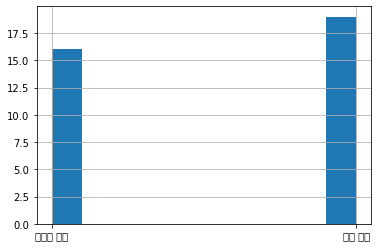

In [260]:
dfG1_1970['jtype'].hist()

<AxesSubplot:>

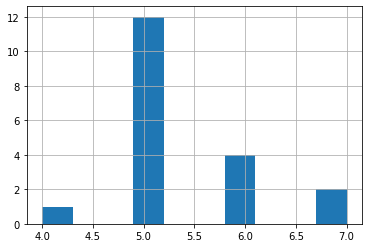

In [261]:
dfG1_1970[dfG1_1970['jtype']=='블루 칼라']['p220110'].hist()

<AxesSubplot:>

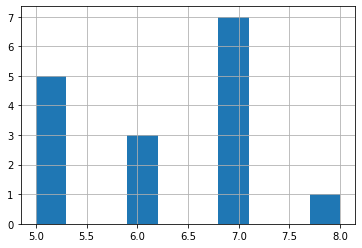

In [262]:
dfG1_1970[dfG1_1970['jtype']=='화이트 칼라']['p220110'].hist()

In [263]:
dfG1_1970 = dfCohort1970[(dfCohort1970['fsize2'] == '소기업') & (dfCohort1970['성별'] == '남성') & (dfCohort1970['jtype'] == '블루 칼라')]

In [264]:
dfG2_1970 = dfCohort1970[(dfCohort1970['fsize2'] == '소기업') & (dfCohort1970['성별'] == '남성') & (dfCohort1970['jtype'] == '화이트 칼라')]

In [265]:
len(dfG1_1970)

19

In [266]:
dfG1_1970[['mwage', 'jtype', 'jtype2', 'p220110', 'p222504']]

,mwage,jtype,jtype2,p220110,p222504
1325,670.0,블루 칼라,상용직,7,2.0
1415,370.0,블루 칼라,상용직,5,2.0
2954,250.0,블루 칼라,상용직,6,1.0
3785,300.0,블루 칼라,상용직,5,2.0
3789,450.0,블루 칼라,상용직,6,2.0
3885,400.0,블루 칼라,상용직,7,2.0
4545,382.0,블루 칼라,상용직,5,2.0
8954,250.0,블루 칼라,상용직,6,2.0
10645,300.0,블루 칼라,상용직,6,2.0
11909,350.0,블루 칼라,임시일용직,5,2.0


In [267]:
dfG1_1970[['mwage', 'jtype', 'jtype2', 'p220110', 'p222504']].median()

mwage      300.0
p220110      5.0
p222504      2.0
dtype: float64

In [268]:
G1 = {'구분': '집단1', '성별': '남성', '기업규모': '소기업', '평균임금': 300.0, '종사상지위': '상용직', '교육수준': '고졸', '직종': '블루 칼라', '노조가입여부': '무노조'}

In [269]:
len(dfG2_1970)

16

In [270]:
dfG2_1970[['mwage', 'jtype', 'jtype2', 'p220110', 'p222504']]

,mwage,jtype,jtype2,p220110,p222504
917,300.0,화이트 칼라,상용직,5,2.0
1080,500.0,화이트 칼라,상용직,7,2.0
4808,348.0,화이트 칼라,상용직,5,2.0
6804,328.0,화이트 칼라,상용직,5,2.0
8449,350.0,화이트 칼라,상용직,7,2.0
9880,330.0,화이트 칼라,상용직,6,1.0
10303,120.0,화이트 칼라,상용직,8,2.0
10318,450.0,화이트 칼라,상용직,7,2.0
10541,350.0,화이트 칼라,상용직,7,2.0
10791,250.0,화이트 칼라,상용직,5,2.0


In [271]:
dfG2_1970[['mwage', 'jtype', 'jtype2', 'p220110', 'p222504']].median()

mwage      339.0
p220110      6.5
p222504      2.0
dtype: float64

In [272]:
G2 = {'구분': '집단2', '성별': '남성', '기업규모': '소기업', '평균임금': 339.0, '종사상지위': '상용직', '교육수준': '4년제 대졸', '직종': '화이트 칼라', '노조가입여부': '무노조'}

In [273]:
G = dict()
for key in G1:
    for dct in [G1, G2, G3, G4]:
        if key in G:
            G[key].append(dct[key])
        else:
            G[key] = [dct[key]]
print(G)

{'구분': ['집단1', '집단2', '집단3', '집단4'], '성별': ['남성', '남성', '남성', '남성'], '기업규모': ['소기업', '소기업', '중기업', '중기업'], '평균임금': [300.0, 339.0, 440.0, 480.0], '종사상지위': ['상용직', '상용직', '상용직', '상용직'], '교육수준': ['고졸', '4년제 대졸', '고졸', '4년제 대졸'], '직종': ['블루 칼라', '화이트 칼라', '블루 칼라', '화이트 칼라'], '노조가입여부': ['무노조', '무노조', '무노조', '무노조']}


In [274]:
pd.DataFrame.from_dict(G)

,구분,성별,기업규모,평균임금,종사상지위,교육수준,직종,노조가입여부
0,집단1,남성,소기업,300.0,상용직,고졸,블루 칼라,무노조
1,집단2,남성,소기업,339.0,상용직,4년제 대졸,화이트 칼라,무노조
2,집단3,남성,중기업,440.0,상용직,고졸,블루 칼라,무노조
3,집단4,남성,중기업,480.0,상용직,4년제 대졸,화이트 칼라,무노조


In [275]:
# 1980년생 전일제 임금근로자 중 관리사무직, 숙련직 종사자
dfCohort1980 = df22p[(df22p['p220104'] == 1980) & (df22p['p220211'] == 1) & (df22p['p220315'] == 2) & (df22p['p220314'] >= 1) & (df22p['p220314'] <= 3) & ((df22p['jtype'] == '블루 칼라') | (df22p['jtype'] == '화이트 칼라'))]

In [276]:
len(dfCohort1980)

215

In [277]:
dfCohort1980.groupby(['p220101', 'jtype', 'jtype2'])['pid'].count().unstack().unstack().fillna(0)

jtype2    상용직        임시일용직       
jtype   블루 칼라 화이트 칼라 블루 칼라 화이트 칼라
p220101                          
1        44.0  102.0   4.0    1.0
2         2.0   60.0   0.0    2.0

In [278]:
# 1990년생 전일제 임금근로자 중 관리사무직, 숙련직 종사자
dfCohort1990 = df22p[(df22p['p220104'] == 1990) & (df22p['p220211'] == 1) & (df22p['p220315'] == 2) & (df22p['p220314'] >= 1) & (df22p['p220314'] <= 3) & ((df22p['jtype'] == '블루 칼라') | (df22p['jtype'] == '화이트 칼라'))]

In [279]:
len(dfCohort1990)

102

In [280]:
dfCohort1990.groupby(['성별', 'jtype', 'jtype2'])['pid'].count().unstack().unstack().fillna(0)

jtype2   상용직        임시일용직       
jtype  블루 칼라 화이트 칼라 블루 칼라 화이트 칼라
성별                              
남성      22.0   32.0   1.0    1.0
여성       2.0   41.0   0.0    3.0